In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
# Convert labels to categorical format (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
# Initialize the model
model = Sequential()


In [ ]:
# Flatten the 28x28 images to a 784-element array
model.add(Flatten(input_shape=(28, 28)))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Add a hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))


In [ ]:
# Add another hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))


In [ ]:
# Add the output layer with 10 neurons (for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8764 - loss: 0.4231 - val_accuracy: 0.9645 - val_loss: 0.1160
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9713 - loss: 0.0968 - val_accuracy: 0.9733 - val_loss: 0.0858
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9805 - loss: 0.0627 - val_accuracy: 0.9708 - val_loss: 0.0917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9842 - loss: 0.0493 - val_accuracy: 0.9760 - val_loss: 0.0808
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9876 - loss: 0.0394 - val_accuracy: 0.9748 - val_loss: 0.0815
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9912 - loss: 0.0269 - val_accuracy: 0.9756 - val_loss: 0.0784
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9778 - val_loss: 0.0780
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9933 - loss: 0.0209

In [ ]:
# Predict the first 5 images from the test set
predictions = model.predict(x_test[:5])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [ ]:
 # Print predicted classes
print("Predicted classes:", np.argmax(predictions, axis=1))
print("True classes:", np.argmax(y_test[:5], axis=1))


Predicted classes: [7 2 1 0 4]
True classes: [7 2 1 0 4]


In [ ]:
import matplotlib.pyplot as plt
import random


In [ ]:
# Select a random image from the test set
random_index = random.randint(0, x_test.shape[0] - 1)
random_image = x_test[random_index]
true_label = np.argmax(y_test[random_index])


In [ ]:
# Reshape the image if needed (not necessary in this case as we're using MLP)
# random_image_reshaped = random_image.reshape(1, 28, 28)
# Make a prediction on the random image
prediction = model.predict(random_image.reshape(1, 28, 28))
predicted_label = np.argmax(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


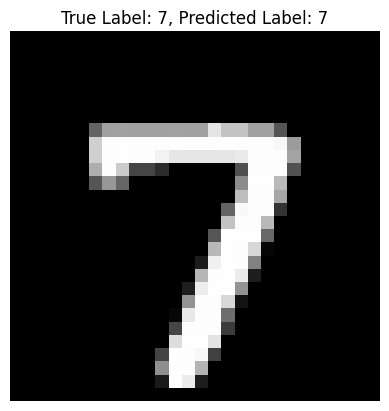

In [ ]:
# Display the image and prediction result
plt.imshow(random_image, cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
